# 442 Poisson Fit

In [30]:

import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

In [31]:
def getValues(filename):
    try:
        file = open(filename, 'r')
    except IOError:
        print "Problem with the", filename
    values =[]
    for line in file:
        values.append(int(line))
    return values    

In [32]:
values = getValues('cs1s.txt')
print values

[7, 14, 6, 3, 10, 5, 5, 10, 10, 9, 7, 14, 9, 7, 11, 9, 13, 8, 11, 8, 16, 8, 11, 9, 12, 13, 14, 7, 8, 9, 7, 7, 9, 5, 14, 13, 9, 11, 13, 8, 9, 9, 11, 9, 8, 8, 8, 11, 12, 9, 10, 5, 11, 8, 14, 7, 9, 10, 15, 5, 13, 13, 8, 12, 22, 11, 8, 2, 4, 9, 13, 9, 6, 7, 11, 8, 11, 8, 8, 10, 10, 10, 8, 14, 7, 9, 13, 15, 10, 8, 8, 8, 12, 5, 11, 14, 6, 8, 11, 10]


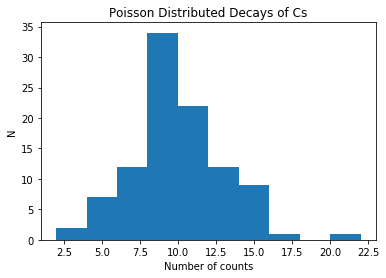

In [33]:

x = plt.figure()
plt.hist(values,10)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Poisson Distributed Decays of Cs")
plt.show()
x.savefig('cs1.eps',format='eps',dpi=1000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Info in <TCanvas::Print>: eps file cs1_1.eps has been created


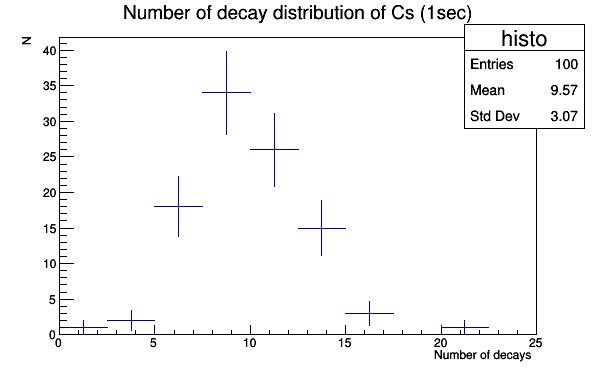

In [34]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Number of decay distribution of Cs (1sec)", 10, 0, 25) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in values:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()
c1.SaveAs("cs1_1.eps")

 FCN=4.42043 FROM MINOS     STATUS=SUCCESSFUL     26 CALLS         100 TOTAL
                     EDM=3.11868e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.41676e+02   2.47293e+01   8.15284e-02  -6.39189e-08
   2  p1           9.99880e+00   2.89322e-01   2.89322e-01  -1.56451e-06


Info in <TCanvas::Print>: eps file cs1_2.eps has been created


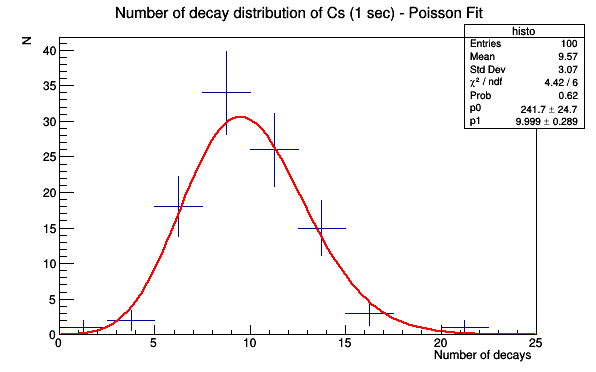

In [35]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",0,25) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(8,9) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of decay distribution of Cs (1 sec) - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()
c1.SaveAs("cs1_2.eps")

 FCN=3.84726 FROM MINOS     STATUS=SUCCESSFUL     49 CALLS         214 TOTAL
                     EDM=4.38079e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.39544e+01   4.31659e+00  -1.24557e-02  -4.61007e-07
   2  Mean         9.87514e+00   3.06792e-01   6.57280e-04   2.47550e-05
   3  Sigma        2.83219e+00   2.21239e-01   2.21239e-01   5.16226e-03


Info in <TCanvas::Print>: eps file cs1_3.eps has been created


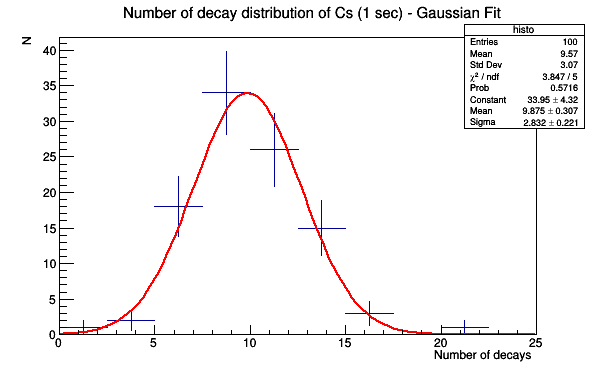

In [36]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(8,9) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of decay distribution of Cs (1 sec) - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")
c1.SaveAs("cs1_3.eps")